<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/projects/DylaLaurUnit8Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Project: Writing a BARTical



##Background

Of all the activity observed on the Sun, two of the most energetic events are Solar Flares and Coronal Mass Ejections (CMEs). A solar flare is a magnetic anomoly that occours on the "surface" of the sun. Like all magnetic-related things there is a positive and negative end. This creates an arch or bridge of Very Hot plasma.

When one end of this solar flare becomes detached from the sun it creates a CME. This flings hot, magnetically active, plasma out into space. Usually, solar active regions that produce large flares will also produce a CME, but this is not always true.

**From Study**

Despite advances in numerical modeling, it is still unclear which circumstances will produce a CME. Therefore, it is worthwhile to empirically determine which features distinguish flares associated with CMEs from flares that are not. At this time, no extensive study has used physically meaningful features of active regions to distinguish between these two populations.

**Credits**

Some of this introduction is from the study I borrowed the data from. This study can be found [here](https://iopscience.iop.org/article/10.3847/0004-637X/821/2/127#apj523289t1)
Data Came from [Here](https://purl.stanford.edu/wt605kh4712)
The Stud

a couple more definitions of whats in my data


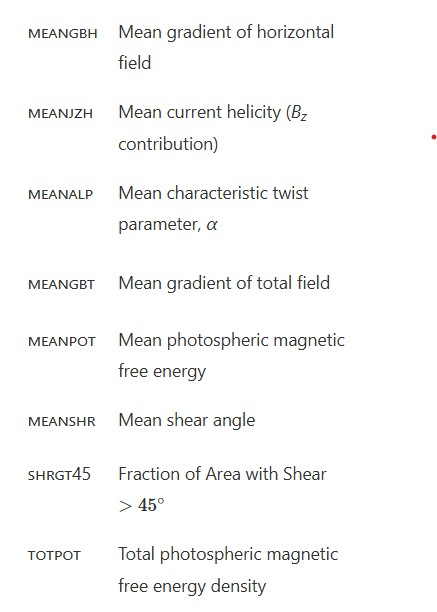

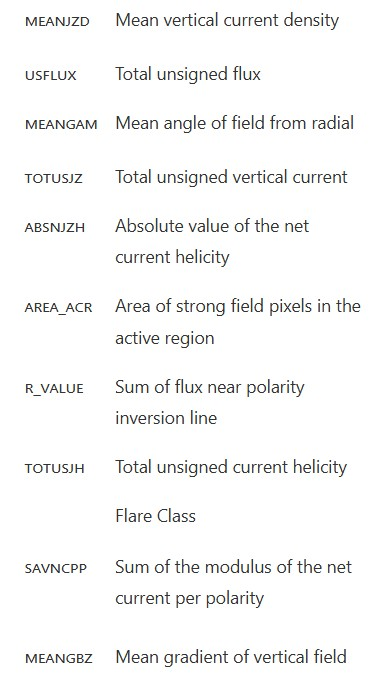



##Clutter

In [ ]:
import arviz as az
!pip install pymc-bart
!pip install preliz

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [ ]:
url="https://raw.githubusercontent.com/Dyl-cmyk/datascience/refs/heads/main/Unit%208%20Project%20Data%20-%20positive_class_events.csv"
CME=pd.read_csv(url)

In [ ]:
#I wanted some better names for these Columns
CME.rename(columns={'Number':'Class','Class':'DateObs'}, inplace=True)


In [ ]:
#Just Some Housekeeping stuff to convert these Numbers into Dates so that BART Recgonizes them as such
datetime_series = pd.to_datetime(CME.DateObs)
print(datetime_series)

0     2011-02-14 01:56:00
1     2011-03-06 14:30:00
2     2011-03-06 20:12:00
3     2011-06-06 06:41:00
4     2011-08-02 13:48:00
              ...        
415   2015-05-04 17:24:00
416   2015-06-12 07:29:00
417   2015-06-19 06:48:00
418   2015-06-20 09:44:00
419   2015-06-20 18:20:00
Name: DateObs, Length: 420, dtype: datetime64[ns]


##Data

In [ ]:
#There are two "classes" present here. A "Positive" or 1 class which shows the conditions and location of the sun at the time when a magnetically active section produced a CME
#The "Negative" or 0 class shows magnetically active section of the sun that did NOT produce a CME
CME

,HARPNUM,NOAA,Class,DateObs,Peak,Time,USFLUX,MEANGBT,MEANJZH,MEANPOT,...,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,Class Value
0,377,11158,22.0,2011.02.14 01:56,2.290000e+22,103.723,0.019589,14129.660,56.345,3015.888,...,111.241,0.106767,5.410000e+13,1.200000e+13,7.140000e+23,51.393,945.314636,4.805,745.381,1
1,401,11166,2.0,2011.03.06 14:30,2.350000e+22,90.899,-0.001738,9597.931,45.475,1744.633,...,95.061,0.132527,3.940000e+13,5.050000e+12,4.860000e+23,44.730,961.502686,4.303,66.343,1
2,393,11164,3.7,2011.03.06 20:12,6.350000e+22,89.238,0.006680,8901.316,28.829,4435.788,...,97.150,-0.078173,8.580000e+13,3.420000e+13,1.100000e+24,36.080,1934.446167,4.842,619.857,1
3,637,11226,2.5,2011.06.06 06:41,2.650000e+22,104.938,0.007635,3160.181,14.941,1671.507,...,105.271,0.019029,3.910000e+13,1.930000e+13,2.000000e+23,29.753,970.551636,3.967,364.119,1
4,750,11261,6.0,2011.08.02 13:48,2.170000e+22,105.247,0.026394,9839.566,42.920,2712.405,...,108.889,0.296319,5.150000e+13,4.450000e+13,5.370000e+23,43.722,1259.099854,4.777,1084.488,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,5526,12335,2.6,2015.05.04 17:24,2.520000e+22,105.354,0.005802,8447.712,40.166,2233.840,...,109.442,0.124192,4.680000e+13,9.590000e+12,4.510000e+23,42.409,1263.797485,4.498,233.215,0
416,5637,12360,1.3,2015.06.12 07:29,5.700000e+22,82.488,0.001285,3897.788,12.100,2835.275,...,87.984,-0.031624,5.650000e+13,1.700000e+12,4.490000e+23,26.183,1631.551880,4.462,111.481,0
417,5692,12371,1.0,2015.06.19 06:48,5.030000e+22,84.406,-0.010059,18649.460,51.975,3790.262,...,95.842,-0.135981,6.700000e+13,2.360000e+13,1.590000e+24,47.933,1852.075806,4.995,644.160,0
418,5673,12367,3.8,2015.06.20 09:44,4.340000e+22,109.424,0.005738,5334.497,18.022,2990.720,...,114.836,-0.025103,5.860000e+13,2.130000e+13,4.430000e+23,31.039,1728.649536,4.532,358.677,0


##Setting UP BART

While I was setting up my Causual diagram and doing some more research I begain to realize that I really don't know as much about CMEs and this data as I thought I did. So, all of the decisions I made are based on what I know and what im guessing is relevant so lets try our first model

In [ ]:
# remidner to use Class Sizes, Time, USFULX, MEANSHR, TOTUSJZ, SAVNCPP to start

#perdictor varible is the x
X = CME[["Class", "Time", "USFLUX", "MEANSHR", "TOTUSJZ", "SAVNCPP"]].to_numpy()
#perdicted varible is the y
Y = CME["Class Value"].to_numpy()

##Attempt 1

In [ ]:
#CMEATT1 = CME attempt #1
with pm.Model() as model_CMEATT1:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, Y, m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_CME1 = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

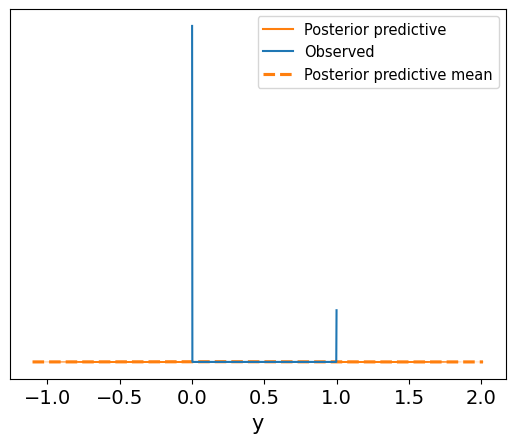

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_CME1, model_CMEATT1, extend_inferencedata=True)
az.plot_ppc(idata_CME1, num_pp_samples=100, colors=["C1", "C0", "C1"])

OOP....so that didn't work. It turns out that this is more complicated than I expected.

Mr.A Suggested that I use this excample and insert bart into Mu. Additionaly the Normal likelihood needs to be a Bernoulli

##Attempt 2

In [ ]:
#lets try with these improvements
with pm.Model() as model_CMEATT2:
  # Bart Goes right here
  μ = μ_ = pmb.BART("μ_", X, Y, m=50)

  #the linear part, mu, is transformed via a sigmoid curve
  θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

  #likelihood Mr A suggested
  y = pm.Bernoulli("y", p=θ, observed= Y)

  idata_CME2 = pm.sample()

Output()

Output()

<Axes: xlabel='y'>

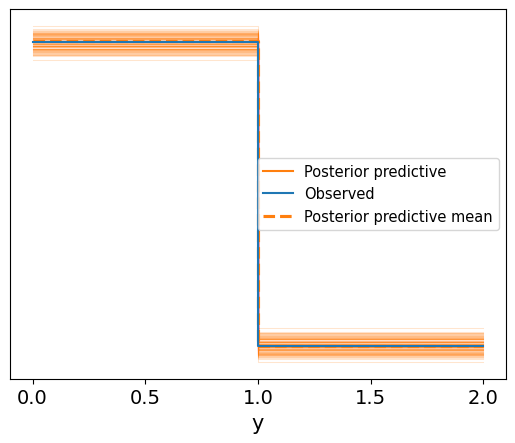

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_CME2, model_CMEATT2, extend_inferencedata=True)
az.plot_ppc(idata_CME2, num_pp_samples=100, colors=["C1", "C0", "C1"])

YAYYY IT worked. But we arent out of the woods yet. Now our goal is to determine what criteria is causisng BART to perdict a solar flare vs a CME

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='X_0'>, <Axes: xlabel='X_1'>, <Axes: xlabel='X_2'>,
       <Axes: xlabel='X_3'>, <Axes: xlabel='X_4'>, <Axes: xlabel='X_5'>],
      dtype=object)

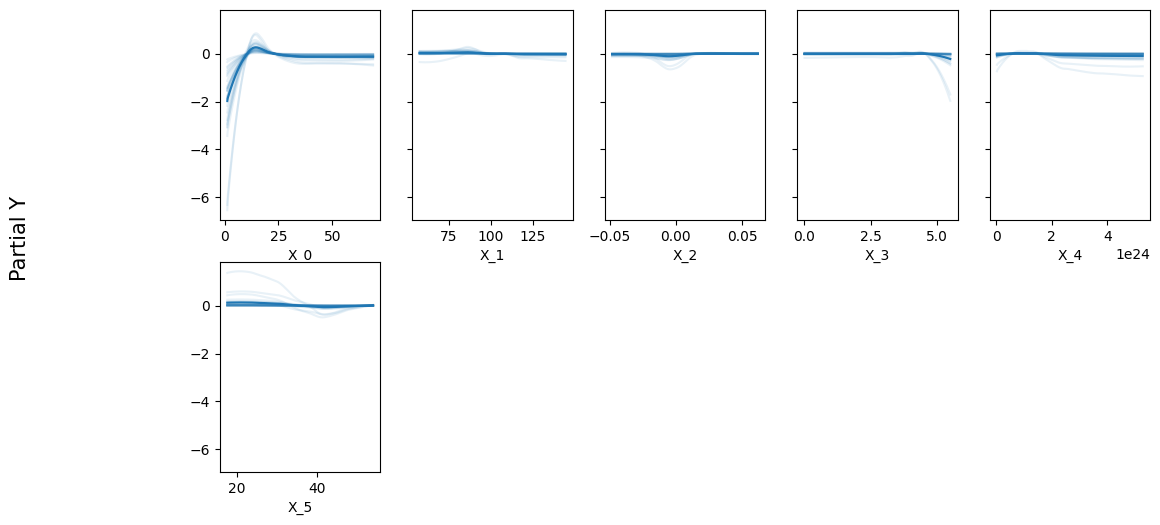

In [ ]:
#starting with ice plots
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

This Ice Plot looks terrible so im gonna rerun the data to see if it helps at all

###Rerunning some stuff

In [ ]:
# remidner to use Class Sizes, Time, USFULX, MEANSHR, TOTUSJZ, SAVNCPP to start

#perdictor varible is the x
X = CME[["Class", "Time", "USFLUX", "MEANSHR", "TOTUSJZ", "SAVNCPP"]]
#perdicted varible is the y
Y = CME["Class Value"]

In [ ]:
#Att 25 = Attempt 2.5
with pm.Model() as model_CMEATT25:
  # Bart Goes right here
  μ = μ_ = pmb.BART("μ_", X, Y, m=50)

  #the linear part, mu, is transformed via a sigmoid curve
  θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

  #likelihood Mr A suggested
  y = pm.Bernoulli("y", p=θ, observed= Y)

  idata_CME25 = pm.sample()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


###Graphs and Plots

/usr/local/lib/python3.11/dist-packages/pymc_bart/utils.py:516: UserWarning: The grid is smaller than the number of available variables to plot.
                Automatically adjusting the grid size.
  warnings.warn(


array([<Axes: xlabel='Class'>, <Axes: xlabel='Time'>,
       <Axes: xlabel='USFLUX'>, <Axes: xlabel='MEANSHR'>,
       <Axes: xlabel='TOTUSJZ'>, <Axes: xlabel='SAVNCPP'>], dtype=object)

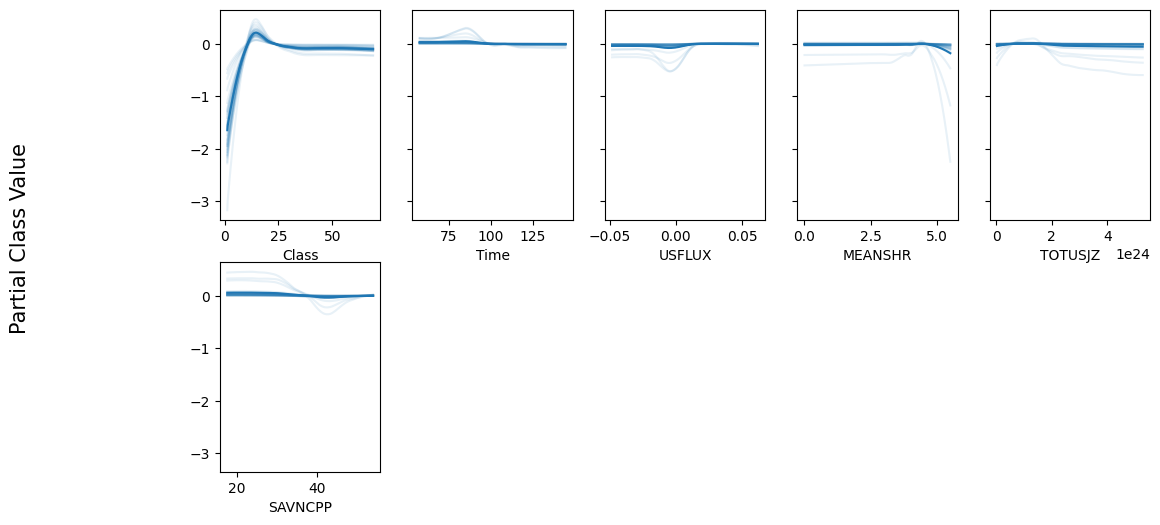

In [ ]:
#starting with ice plots
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

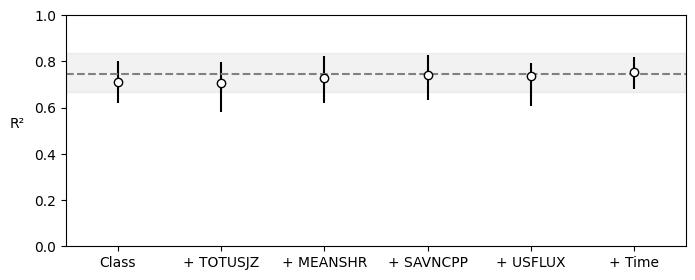

In [ ]:

vi_CME = pmb.compute_variable_importance(idata_CME25, μ_, X)
pmb.plot_variable_importance(vi_CME)

Between the VI plot and the ICE plot we don't have a lot of information on what part of this model is the most important. Sooo lets drop a varible.

##Attempt 3

In [ ]:
#I have decided to drop USFLUX

#perdictor varible is the x
X = CME[["Class", "MEANSHR", "TOTUSJZ", "SAVNCPP"]]
#perdicted varible is the y
Y = CME["Class Value"]

In [ ]:
with pm.Model() as model_CMEATT3:
  μ = μ_ = pmb.BART("μ_", X, Y, m=50)

  θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

  y = pm.Bernoulli("y", p=θ, observed= Y)

  idata_CME3 = pm.sample()

Output()

Output()

<Axes: xlabel='y'>

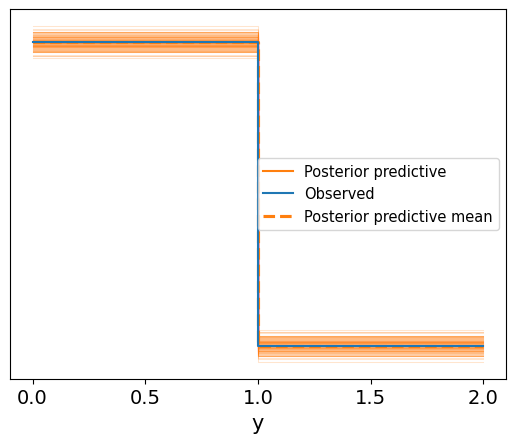

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_CME3, model_CMEATT3, extend_inferencedata=True)
az.plot_ppc(idata_CME3, num_pp_samples=100, colors=["C1", "C0", "C1"])

Okay.....That seemed to have helped. Lets take a look at the ICE and VI Plots

array([<Axes: xlabel='Class'>, <Axes: xlabel='MEANSHR'>,
       <Axes: xlabel='TOTUSJZ'>, <Axes: xlabel='SAVNCPP'>], dtype=object)

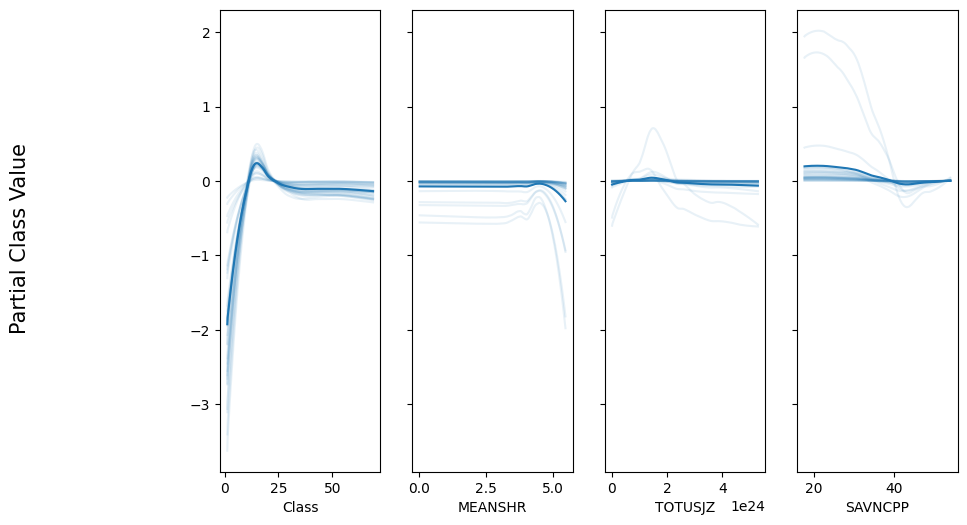

In [ ]:
#starting with ice plots
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

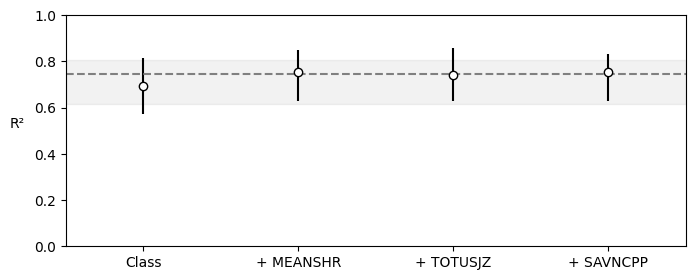

In [ ]:
vi_CME = pmb.compute_variable_importance(idata_CME3, μ_, X)
pmb.plot_variable_importance(vi_CME)

YES!! This is very good! We had A successful removal of stuff and and increase in R squared value. Lets try to get this higher

##Attempt 4

In [ ]:
#I have decided to drop TOTUSJZ and MEANSHR due to their "inactive" ICE Plots...Lets see how this goes

#perdictor varible is the x
X = CME[["Class", "SAVNCPP"]]
#perdicted varible is the y
Y = CME["Class Value"]

In [ ]:
with pm.Model() as model_CMEATT4:
  # Bart Goes right here
  μ = μ_ = pmb.BART("μ_", X, Y, m=50)

  #the linear part, mu, is transformed via a sigmoid curve
  θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

  #likelihood Mr A suggested
  y = pm.Bernoulli("y", p=θ, observed= Y)

  idata_CME4 = pm.sample()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

<Axes: xlabel='y'>

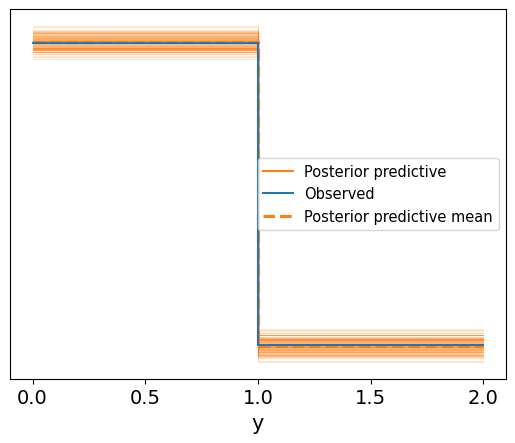

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_CME4, model_CMEATT4, extend_inferencedata=True)
az.plot_ppc(idata_CME4, num_pp_samples=100, colors=["C1", "C0", "C1"])

<Axes: ylabel='R²'>

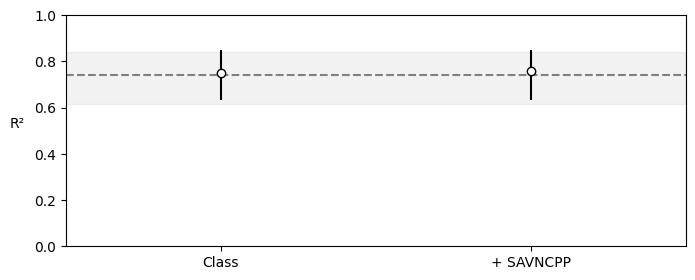

In [ ]:
vi_CME = pmb.compute_variable_importance(idata_CME4, μ_, X)
pmb.plot_variable_importance(vi_CME)

Not much change here...Lets try one varible

##Attempt 5

Based on all of the previous R values going up every time I remove a varible. (exept the last one) I am going to assume that the best thing to do is have Class as the only varible...lets see

In [ ]:


#perdictor varible is the x
X = CME[["Class"]]
#perdicted varible is the y
Y = CME["Class Value"]

In [ ]:
X

,Class
0,22.0
1,2.0
2,3.7
3,2.5
4,6.0
...,...
415,2.6
416,1.3
417,1.0
418,3.8


In [ ]:
with pm.Model() as model_CMEATT5:
  # Bart Goes right here
  μ = μ_ = pmb.BART("μ_", X, Y, m=50)

  #the linear part, mu, is transformed via a sigmoid curve
  θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

  #likelihood Mr A suggested
  y = pm.Bernoulli("y", p=θ, observed= Y)

  idata_CME5 = pm.sample()

Output()

Output()

<Axes: xlabel='y'>

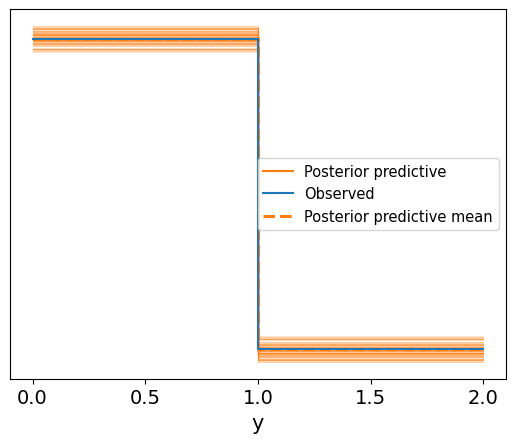

In [ ]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_CME5, model_CMEATT5, extend_inferencedata=True)
az.plot_ppc(idata_CME5, num_pp_samples=100, colors=["C1", "C0", "C1"])

<Axes: ylabel='R²'>

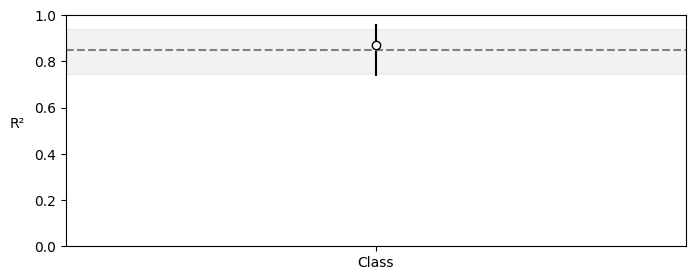

In [ ]:
vi_CME = pmb.compute_variable_importance(idata_CME5, μ_, X)
pmb.plot_variable_importance(vi_CME)

Okay, so the R value did go up, but not as high as possible...Im going to try to add one or two back in and see what happens

##Attempt 6

In [ ]:
#im gonna add TOTUSJZ back in

#perdictor varible is the x
X = CME[["Class", "TOTUSJZ"]]
#perdicted varible is the y
Y = CME["Class Value"]

In [ ]:
with pm.Model() as model_CMEATT6:
  # Bart Goes right here
  μ = μ_ = pmb.BART("μ_", X, Y, m=50)

  #the linear part, mu, is transformed via a sigmoid curve
  θ = pm.Deterministic("θ", pm.math.sigmoid(μ))

  #likelihood Mr A suggested
  y = pm.Bernoulli("y", p=θ, observed= Y)

  idata_CME6 = pm.sample()

Output()

<Axes: ylabel='R²'>

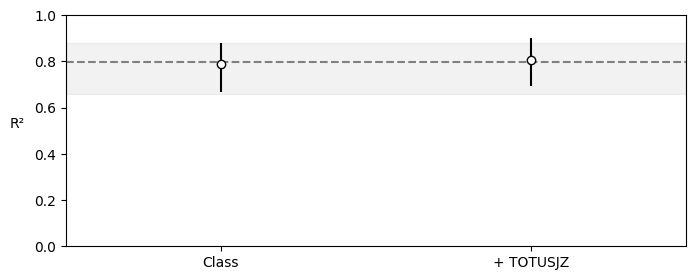

In [ ]:
vi_CME = pmb.compute_variable_importance(idata_CME6, μ_, X)
pmb.plot_variable_importance(vi_CME)

I Mean it's not bad, but its not better than Just Class alone...

I ended up trying a couple renditions trying to get the R squared value up but nothing worked.

This actually does make my life a little easier though as I can simply use Class for my plot to see at what point a solar flare will become a CME

##Conclusion

In [ ]:
posterior_mean = idata_CME5.posterior["μ_"]

μ_hdi = az.hdi(ary=idata_CME5, group="posterior", var_names=["μ_"], hdi_prob=0.74)

pps = az.extract(
    idata_CME5, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


TypeError: Dimension mismatch for x: (420, 1) and hdi: (420, 2). Check the dimensions of y andhdi_kwargs to make sure they are compatible

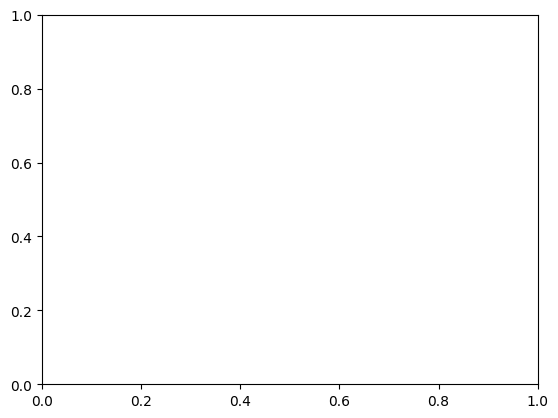

In [ ]:
X = CME[["Class"]]
idx = np.argsort(X)
fig, ax = plt.subplots()

az.plot_hdi(
    x=X,
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X[X],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(CME["Class Value"], CME["Class"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="Class",
    ylabel="Class Value",
);

I have no idea why this isn't working, but I can't do anything about it. Kinda sucks I cant see the thing ive been working toward this whole time.

But I can say that the likelihood of a CME occouring seems to be almost directly tied to how large the solar flare is.